In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
a=pd.read_csv('Churn_Modelling.csv')
a.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
a=a.set_index("RowNumber")
a.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


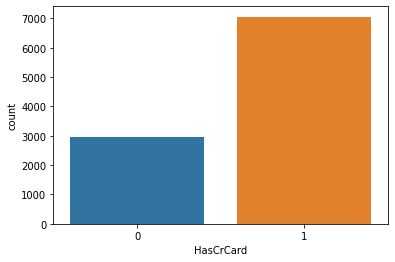

In [ ]:
sn.countplot(data=a,x="HasCrCard")

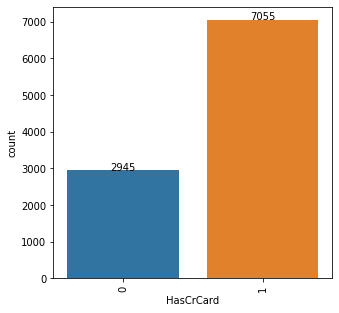

In [ ]:
fig,ax=mp.subplots(figsize=(5,5))
grap=sn.countplot(ax=ax,x="HasCrCard",data=a)
grap.set_xticklabels(grap.get_xticklabels(),rotation=90)
for i in grap.patches:
    height=i.get_height()
    grap.text(i.get_x()+i.get_width()/2.,height+0.1,height,ha="center")

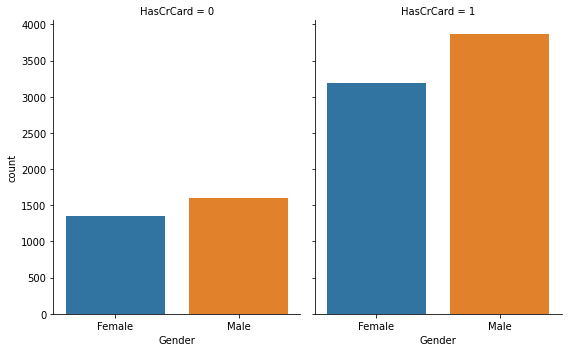

In [ ]:
sn.catplot(x="Gender",col="HasCrCard",data=a,kind="count",height=5,aspect=.8)

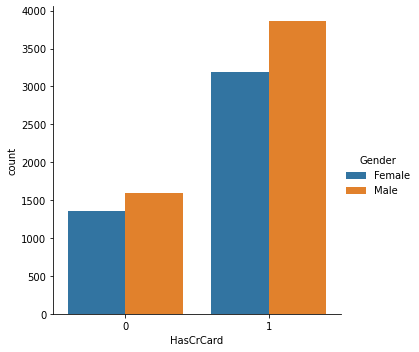

In [ ]:
sn.catplot(x="HasCrCard",hue="Gender",data=a,kind='count')

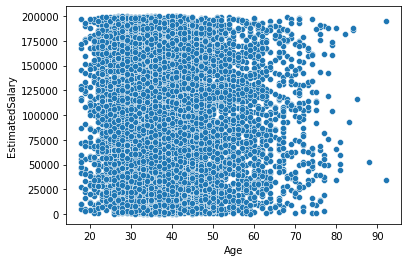

In [ ]:
sn.scatterplot(x=a["Age"],y=a["EstimatedSalary"])

# Multivariate Analysis


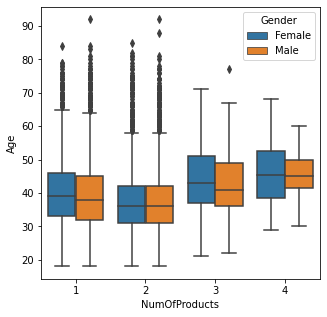

In [ ]:
fig,ax=mp.subplots(figsize=(5,5))
test=sn.boxplot(ax=ax,x="NumOfProducts",y="Age",hue="Gender",data=a)

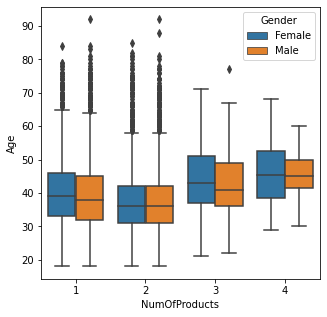

In [ ]:
fig,ax=mp.subplots(figsize=(5,5))
test=sn.boxplot(ax=ax,x="NumOfProducts",y="Age",hue="Gender",data=a)

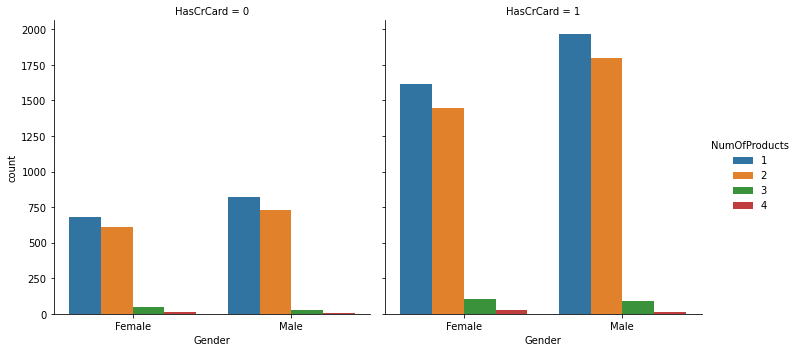

In [ ]:
sn.catplot(data=a,col="HasCrCard",x="Gender",hue="NumOfProducts",kind="count")

In [ ]:
a.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
a.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
median=a.loc[a["CreditScore"]>900,"CreditScore"].median()
a["CreditScore"]=np.where(a["CreditScore"]>900,median,a["CreditScore"])

In [ ]:
a.dtypes

CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
x=a.iloc[:,:-1].values
y=a.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
a['Surname']=l.fit_transform(a['Surname'])
a['Geography']=l.fit_transform(a['Geography'])
a['Gender']=l.fit_transform(a['Gender'])

scale=StandardScaler()
s=scale.fit(a)
s

StandardScaler()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
print(x_train.shape)

(7500, 12)
